# Wine Quality Prediction Using Linear Regression in SageMaker Studio Lab

This notebook demonstrates two approaches to training a linear regression model using the Wine Quality dataset:

**Part 2a - Without container technology: Training in a standard Jupyter environment.

**Part 2b – With container technology: Using Docker in SageMaker Studio Lab.


Import Libraries and Load the Dataset

In [10]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# 2. Load the Dataset
# Load the combined wine dataset
df = pd.read_csv("winequality_combined.csv")
print(df.head())
print("Dataset shape:", df.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          0  
1      9.8        5 

Explore and Preprocess the Data

In [11]:
# Check data types and for missing values
print(df.info())         
print(df.isnull().sum()) 

# If there's a 'type' column (e.g., red/white), convert it to numeric for modeling
if 'type' in df.columns:
    print("Unique values in 'type':", df['type'].unique())
    # Map wine type to numeric (e.g., red=0, white=1)
    df['type'] = df['type'].map({'red': 0, 'white': 1})
    print("After encoding 'type':", df['type'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid       

Define Feature Matrix X and Target y, then Split Data

In [12]:
# Separate features (X) and target (y)
X = df.drop('quality', axis=1)  # all columns except 'quality'
y = df['quality']              # the target column

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Print the sizes of the splits
print("Training set size:", X_train.shape[0], "samples")
print("Test set size:", X_test.shape[0], "samples")


Training set size: 5197 samples
Test set size: 1300 samples


Train a Linear Regression Model
Training data is ready, we can now create and train the linear regression model using scikit-learn’s LinearRegression class:

In [13]:

# Initialize the Linear Regression model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

# Output the learned parameters
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1...bn):", model.coef_)


Intercept (b0): 102.63880022907205
Coefficients (b1...bn): [ 9.21330302e-02 -1.50880993e+00 -9.78878286e-02  6.28216515e-02
 -5.82631627e-01  5.97790423e-03 -1.63243044e-03 -1.02081690e+02
  5.27633123e-01  7.63015400e-01  2.32593705e-01 -3.35208372e-01]


Make Predictions on the Test Set

We will be using the trained model to predict wine quality for the test set features, and store the predictions:

In [19]:
# Use the trained model to predict on the test set
y_pred = model.predict(X_test)

# Inspect the first few predictions alongside actual values
print("First 5 predictions:", y_pred[:5])
print("First 5 actual quality values:", y_test.iloc[:5].values)


First 5 predictions: [6.69332728 5.16841868 6.29909159 5.74156707 5.40742754]
First 5 actual quality values: [8 5 7 6 6]


Evaluating the Model  MSE and R²
To assess the performance of the linear regression model, we will calculate the Mean Squared Error (MSE) and the R-squared (R²) score on the test set:

In [20]:
# Calculating Mean Squared Error and R^2 on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) on test set: {mse:.3f}")
print(f"R^2 Score on test set: {r2:.3f}")


Mean Squared Error (MSE) on test set: 0.541
R^2 Score on test set: 0.267


Mean Squared Error (MSE): 0.541

R² Score: 0.267: This means the model explains about 26.7% of the variance in wine quality using linear regression.

Generally, these are expected values for this dataset with a basic linear model. 

Wine quality is affected by many non-linear factors, so it’s common that linear regression doesn’t achieve a very high R².

Visualizing the Results

Finally, it’s advantageous to visualize the model’s predictions vs the actual values to get an understanding of how well it performed. 
Creating a scatter plot of actual quality vs predicted quality for the test set:

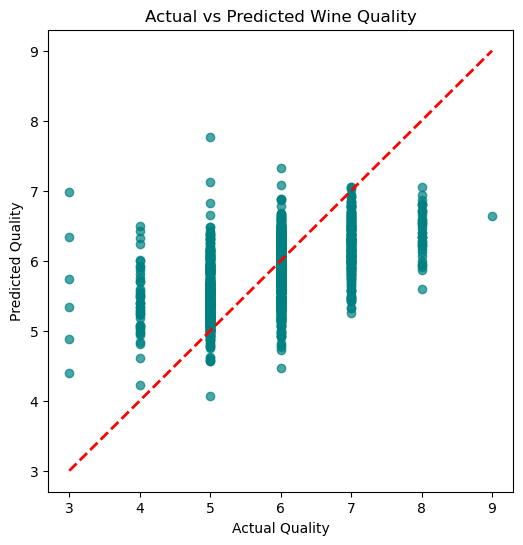

In [21]:
# Scatter plot of Actual vs Predicted quality
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.show()


The red dashed line represents perfect predictions, that is, Predicted = Actual. Most points mostly hover around the center, with slight under and over predictions.

The clustered vertical bands show that wine quality is somewhat difficult to predict linearly, which is normal for this dataset.

# Part 2b: Using Container Technology in SageMaker Studio Lab

We would be repeating the linear regression model using a custom Docker container. 

The container installs dependencies, runs `train.py`, trains the model, prints evaluation metrics, and saves the model file.

Here, we would repeat the model training using a custom Docker container.
The container:
- Installs dependencies
- Executes `train.py` script
- Trains a linear regression model
- Prints evaluation metrics



In [23]:
!cd wine_quality_container && ls


Dockerfile  requirements.txt  train.py	winequality_combined.csv


In [24]:
!cd wine_quality_container && ls


Dockerfile  requirements.txt  train.py	winequality_combined.csv


In [25]:
!cd wine_quality_container && docker build -t wine-quality-container .


DEPRECATED: The legacy builder is deprecated and will be removed in a future release.
            BuildKit is currently disabled; enable it by removing the DOCKER_BUILDKIT=0
            environment-variable.

Error response from daemon: {"message":"Forbidden. Reason: [ImageBuild] 'sagemaker' is the only user allowed network input"}


In [27]:
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()
role = get_execution_role()
role


sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix


'arn:aws:iam::173534767361:role/datazone_usr_role_3rn60pdlmark15_5fzspz1btq98dl'

In [29]:
bucket_name = sagemaker_session.default_bucket()  # or use your custom bucket name
train_input = sagemaker_session.upload_data(
    path="winequality_combined.csv", 
    bucket=bucket_name, 
    key_prefix="data"
)


In [32]:
script_path = "src/wine_quality_container/train.py"


In [39]:
from sagemaker.sklearn.estimator import SKLearn

sklearn = SKLearn(
    entry_point='train.py',                   # just the filename
    source_dir='wine_quality_container',      # relative directory that contains train.py + requirements.txt
    instance_type='ml.m5.large',              # or ml.t3.medium if available
    framework_version='0.20.0',
    py_version='py3',
    role=role,
    sagemaker_session=sagemaker_session
)

sklearn.fit({'train': train_input})


sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.Subnets
sagemaker.config INFO - Applied value from config key = SageMaker.TrainingJob.VpcConfig.SecurityGroupIds
2025-05-25 21:41:17 Starting - Starting the training job...
2025-05-25 21:41:50 Downloading - Downloading input data...
2025-05-25 21:42:15 Downloading - Downloading the training image.....2025-05-25 21:43:00,723 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-05-25 21:43:00,726 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-05-25 21:43:00,735 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-05-25 21:43:00,989 sagemaker-training-toolkit INFO     Installing dependencies from requirements.txt:
/miniconda3/bin/python -m pip install -r requirements.txt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.0 MB/s eta 0:00:00
2025-05-25 21:43:02,203 sagemaker-training-too

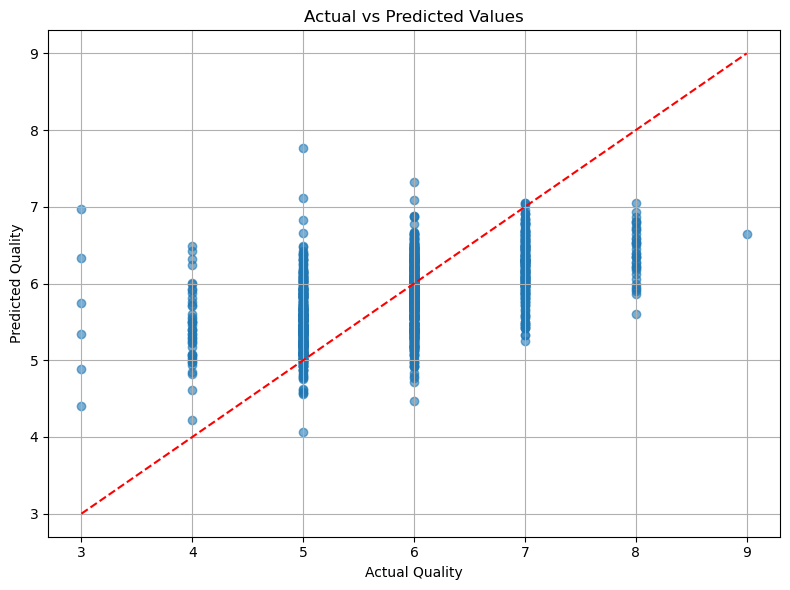

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the predictions CSV (ensure the correct path is set)
pred_df = pd.read_csv("predictions.csv")

# Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(pred_df["Actual"], pred_df["Predicted"], alpha=0.6)
plt.plot(
    [pred_df["Actual"].min(), pred_df["Actual"].max()],
    [pred_df["Actual"].min(), pred_df["Actual"].max()],
    color='red', linestyle='--'
)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.grid(True)
plt.tight_layout()
plt.show()
